In [1]:
from utils.converters import df_to_XY
from utils.readers import *
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read data
## M&A Volume

In [2]:
df = read_acquiror_uk()
df['Date'] = df['Date'].dt.to_period('M')
df

,Date,Target Name,Target Industry Sector,Target\r\nNation,Acquiror Name,Acquiror Industry Sector,Acquiror\r\nNation,%\r\nof\r\nShares\r\nAcq.,%\r\nOwned\r\nAfter\r\nTrans-\r\naction,Value\r\nof\r\nTransaction\r\n($mil),Acquiror\r\nTicker\r\nSymbol,Target\r\nTicker\r\nSymbol,Acquiror\r\nDatastream\r\nCode,Target\r\nDatastream\r\nCode
0,2000-01,Beltpacker PLC,"Soaps, Cosmetics, and Personal-Care Products",United Kingdom,3i Group PLC,"Investment & Commodity Firms,Dealers,Exchanges",United Kingdom,30.4,30.4,NaN,III,NaN,960338,NaN
1,2000-01,Intellex SRL,Prepackaged Software,Italy,3i Group PLC,"Investment & Commodity Firms,Dealers,Exchanges",United Kingdom,100.0,100.0,NaN,III,NaN,960338,NaN
2,2000-01,Premier Womenswear,Amusement and Recreation Services,United Kingdom,Emap PLC,"Printing, Publishing, and Allied Services",United Kingdom,100.0,100.0,NaN,EMA,NaN,910283,NaN
3,2000-01,Supergrif Kitchen And Bath,"Stone, Clay, Glass, and Concrete Products",Spain,Delta PLC,Metal and Metal Products,United Kingdom,100.0,100.0,NaN,DLTA,NaN,901150,NaN
4,2000-01,Tranman Solutions Ltd,Prepackaged Software,United Kingdom,Lex Service PLC,Miscellaneous Retail Trade,United Kingdom,50.0,50.0,1.503,LEXL,NaN,900959,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16763,2022-01,Michael J Field Consulting,Business Services,United Kingdom,XPS Pensions Group PLC,Business Services,United Kingdom,100.0,100.0,5.006,XAF,NaN,9030AZ,NaN
16764,2022-05,Hellenic Minerals IKE,Mining,Greece,Rockfire Resources PLC,Mining,United Kingdom,100.0,100.0,.93,ROCK,NaN,86900D,NaN
16765,2021-12,Ego Eyewear Ltd,"Measuring, Medical, Photo Equipment; Clocks",Sweden,Inspecs Group PLC,"Measuring, Medical, Photo Equipment; Clocks",United Kingdom,100.0,100.0,NaN,SPEC,NaN,9605JM,NaN
16766,2021-12,Hunting Energy Svcs (UK) Ltd,Oil and Gas; Petroleum Refining,United Kingdom,Hunting PLC,Machinery,United Kingdom,40.0,100.0,NaN,HNTIY\r\nHTG,NaN,917509,NaN


In [3]:
out = {'date': [], 'vol': []}
for y in range(2000, 2022):
    for m in range(1, 13):
        i = f"{y}-{m}"
        d = df[df['Date'] == i]
        out['date'].append(i)
        out['vol'].append(len(d))

In [4]:
vol_monthly = pd.DataFrame(out)
vol_monthly

,date,vol
0,2000-1,101
1,2000-2,117
2,2000-3,158
3,2000-4,139
4,2000-5,113
...,...,...
259,2021-8,60
260,2021-9,57
261,2021-10,60
262,2021-11,53


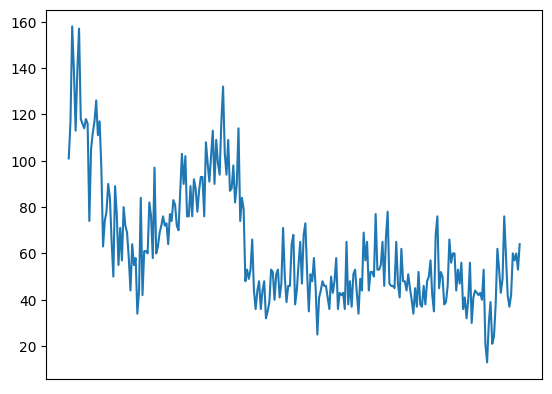

In [5]:
ax = plt.gca()
ax.plot(vol_monthly.date, vol_monthly.vol)
ax.set_xticks([]);

## GDP

In [6]:
gdp_quarter = read_gdp()
until = '2022-01'
gdp_quarter['Date'] = gdp_quarter['Date'].dt.to_period('M')
gdp_quarter = gdp_quarter[gdp_quarter['Date'] < until]
gdp_quarter

,Date,UK_GDP
0,2000-02,403407.0
1,2000-05,406049.0
2,2000-08,408120.0
3,2000-11,409871.0
4,2001-02,413381.0
...,...,...
83,2020-11,509621.0
84,2021-02,503663.0
85,2021-05,536608.0
86,2021-08,546084.0


In [9]:
res = []
for i in range(int(len(vol_monthly)/3)):
    s = vol_monthly[3*i: 3*(i+1)]
    res.append(s.vol.sum())
gdp_quarter['vol'] = res
gdp_quarter

,Date,UK_GDP,vol
0,2000-02,403407.0,376
1,2000-05,406049.0,391
2,2000-08,408120.0,391
3,2000-11,409871.0,348
4,2001-02,413381.0,291
...,...,...,...
83,2020-11,509621.0,153
84,2021-02,503663.0,168
85,2021-05,536608.0,138
86,2021-08,546084.0,159


## Variables

In [11]:
until = '2022-01'
var_monthly = read_variable_monthly()
var_monthly['Date'] = var_monthly['Date'].dt.to_period('M')
var_monthly = var_monthly[var_monthly['Date'] < until]

res = {'EXUSUK': [], 'Interest_Rate': [], 'SMI': []}
for i in range(int(len(var_monthly)/3)):
    s = var_monthly[3*i: 3*(i+1)]
    res['EXUSUK'].append(s.EXUSUK.mean())
    res['Interest_Rate'].append(s['Interest_Rate'].mean())
    res['SMI'].append(s.SMI.mean())
gdp_quarter['EXUSUK'] = res['EXUSUK']
gdp_quarter['Interest_Rate'] = res['Interest_Rate']
gdp_quarter['SMI'] = res['SMI']
gdp_quarter

,Date,UK_GDP,vol,EXUSUK,Interest_Rate,SMI
0,2000-02,403407.0,376,1.606767,5.916667,1241.948000
1,2000-05,406049.0,391,1.533500,6.000000,1193.004000
2,2000-08,408120.0,391,1.476700,6.000000,1181.404333
3,2000-11,409871.0,348,1.446433,6.000000,1121.388000
4,2001-02,413381.0,291,1.458167,5.833333,1112.460333
...,...,...,...,...,...,...
83,2020-11,509621.0,153,1.320400,0.100000,911.964667
84,2021-02,503663.0,168,1.379033,0.100000,1045.408667
85,2021-05,536608.0,138,1.398467,0.100000,1131.969000
86,2021-08,546084.0,159,1.377900,0.100000,1151.498333


# Regression
## Monthly variables

In [13]:
x_index = ['EXUSUK', 'Interest_Rate', 'SMI', 'UK_GDP']
y_index = ['vol']
X, Y = df_to_XY(gdp_quarter, xkeys=x_index, ykeys=y_index)
reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

0.8653869933359294

In [14]:
reg.coef_

array([[-1.26708099e+02,  2.62579971e+01,  1.89736555e-01,
        -5.03198439e-04]])

In [15]:
reg.intercept_

array([357.86576445])

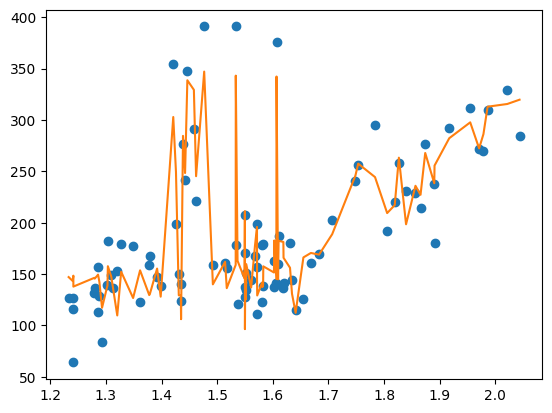

In [16]:
ax = plt.gca()

_xindex = 0  # ['GDP', 'FOREX', 'CPI', 'Interest_rate', 'SMI']
_yindex = 0  # [value, num]

x = X[:, _xindex]
y = Y[:, _yindex]
beta = reg.coef_
const =  reg.intercept_[_yindex]

Y_pred = X @ beta.T + const
y_pred = Y_pred[:, _yindex]

ax.plot(x, y, marker='o', ls="")
index = np.argsort(x)
ax.plot(x[index], y_pred[index])

## Quarterly GDP

In [48]:
x_index = ['UK_GDP']
y_index = ['vol']

X, Y = df_to_XY(gdp_quarter, xkeys=x_index, ykeys=y_index)
reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

0.3000850982240395

In [49]:
reg.coef_

array([[-0.00089949]])